/Users/darien/miniforge3/envs/QuantumEnv/lib/python3.12/site-packages/qiskit/providers/fake_provider/generic_backend_v2.py:500: RuntimeWarning: Aer not found using BasicSimulator and no noise
  warnings.warn("Aer not found using BasicSimulator and no noise", RuntimeWarning)


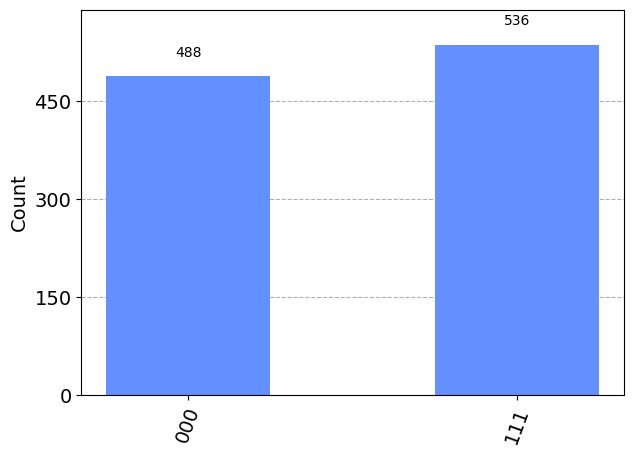

In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit.providers.fake_provider import GenericBackendV2
from qiskit.visualization import plot_histogram

# Generate a 5-qubit simulated backend
backend = GenericBackendV2(num_qubits=5)

# Create a simple circuit
circuit = QuantumCircuit(3)
circuit.h(0)
circuit.cx(0, 1)
circuit.cx(0, 2)
circuit.measure_all()
circuit.draw("mpl")

# Transpile the ideal circuit to a circuit that can be directly executed by the backend
transpiled_circuit = transpile(circuit, backend)
transpiled_circuit.draw("mpl")

# Run the transpiled circuit using the simulated backend
job = backend.run(transpiled_circuit)
counts = job.result().get_counts()
plot_histogram(counts)

In [2]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile

# from qiskit import QasmSimulator

# from qiskit_ibm_provider.IBMProvider


from qiskit.visualization import *
from qiskit.visualization import circuit_drawer

# from ibm_quantum_widgets import *
# from qiskit.providers.aer import QasmSimulator
from math import pi

# from ibm_quantum_widgets import draw_circuit

# Loading your IBM Quantum account(s)

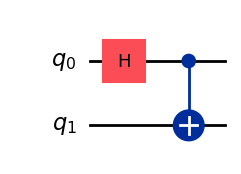

In [3]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram, array_to_latex
from qiskit.quantum_info import Statevector

# Step 1: Create the Bell State |Φ+⟩ = 1/√2(|00⟩ + |11⟩)
bell_circuit = QuantumCircuit(2)
bell_circuit.h(0)  # Apply Hadamard gate to the first qubit
bell_circuit.cx(0, 1)  # Apply CNOT gate with qubit 0 as control and qubit 1 as target

# Visualize the circuit
bell_circuit.draw(output="mpl")

     ┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘


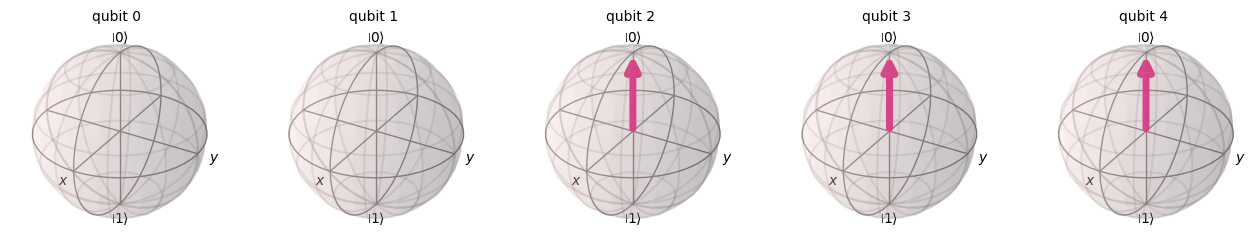

In [17]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_bloch_multivector, plot_histogram, circuit_drawer
from qiskit_ibm_runtime.fake_provider import FakeProvider, FakeManhattan
from qiskit import transpile
import matplotlib.pyplot as plt

from qiskit_ibm_runtime.fake_provider import FakeProvider

backend = FakeProvider().get_backend("fake_ourense")
# Create a quantum circuit with 2 qubits

qc = QuantumCircuit(2)

# Apply a Hadamard gate to the first qubit
qc.h(0)

# Apply a CNOT gate with qubit 0 as control and qubit 1 as target
qc.cx(0, 1)

# Draw the circuit
print(qc.draw())

# To visualize the state, you will need to simulate it
# New path


# new_circuit = transpile(circuit, backend)
# job = backend.run(new_circuit)
# simulator = Aer.get_backend('statevector_simulator')
result = transpile(qc, backend)
# result.draw('mpl')

from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector


state = Statevector(result)
plot_bloch_multivector(state)

In [ ]:
statevector = result.get_statevector()

# Visualize the statevector
plot_bloch_multivector(statevector)

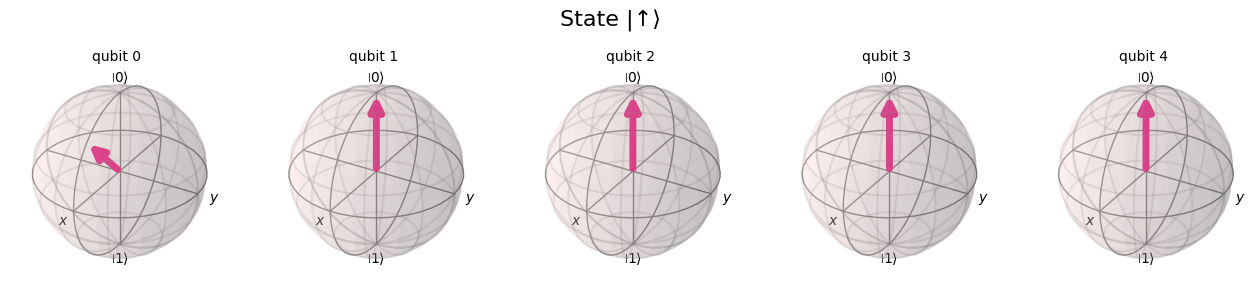

In [27]:
def visualize_basis(theta):
    # Create quantum circuits for |↑⟩ and |↓⟩
    qc_up = QuantumCircuit(1)
    qc_down = QuantumCircuit(1)

    # Apply rotation for |↑⟩
    qc_up.ry(theta, 0)

    # Apply rotation for |↓⟩, opposite direction
    qc_down.ry(-theta, 0)

    # Execute the circuits
    state_up = Statevector(transpile(qc_up, backend))
    state_down = Statevector(transpile(qc_down, backend))

    # Visualize the states

    return (
        plot_bloch_multivector(state_up, title="State |↑⟩"),
        plot_bloch_multivector(state_down, title="State |↓⟩"),
    )


# Example usage with a rotation of pi/4 radians (~45 degrees)
visualize_basis(theta=3.141592653589793 / 4)[0]

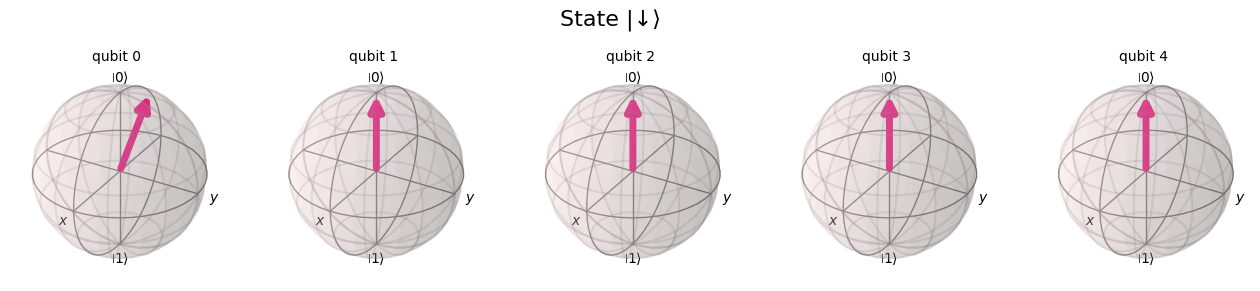

In [28]:
visualize_basis(theta=3.141592653589793 / 4)[1]

In [79]:
# To run on hardware, select the backend with the fewest number of jobs in the queue
# service = QiskitRuntimeService(channel="ibm_quantum")
# backend = service.least_busy(operational=True, simulator=False)
# backend.name

backend = FakeProvider().get_backend("fake_manhattan")
backend.configuration

<bound method BackendV1.configuration of <FakeManhattan('fake_manhattan')>>

In [65]:
# Define the entangled state given in the problem
qc = QuantumCircuit(3)

# Apply gates to generate the specific entangled state: 1/2(|000⟩ - |011⟩ - |101⟩ - |110⟩)
qc.x([1, 2])
qc.h(0)
qc.cx(0, 1)
qc.cx(0, 2)
qc.z([1, 2])
qc.barrier()

# Measurement strategy based on the received bit x_i
# Here we simulate one instance where each player decides to measure in Hadamard or computational basis
# This is for demonstration; the actual strategy would depend on x_i values, simulated separately

# Alice measures in Hadamard basis (applies H before measurement for basis change)
qc.h(0)

# Bob measures in computational basis (no change needed)
# Charlie measures in Hadamard basis (applies H before measurement for basis change)
qc.h(2)

# Measure
qc.measure_all()

qc.draw()

┌───┐                ░ ┌───┐ ░ ┌─┐      
   q_0: ┤ H ├──■────■────────░─┤ H ├─░─┤M├──────
        ├───┤┌─┴─┐  │  ┌───┐ ░ └───┘ ░ └╥┘┌─┐   
   q_1: ┤ X ├┤ X ├──┼──┤ Z ├─░───────░──╫─┤M├───
        ├───┤└───┘┌─┴─┐├───┤ ░ ┌───┐ ░  ║ └╥┘┌─┐
   q_2: ┤ X ├─────┤ X ├┤ Z ├─░─┤ H ├─░──╫──╫─┤M├
        └───┘     └───┘└───┘ ░ └───┘ ░  ║  ║ └╥┘
meas: 3/════════════════════════════════╩══╩══╩═
                                        0  1  2

In [ ]:
from qiskit.primitives import BackendEstimator

print(f" > Expectation value: {result.values}")
print(f" > Metadata: {result.metadata}")

In [ ]:
import trueq as tq
import qiskit as qk

In [ ]:
result = job.result()
print(f">>> {result}")
print(f"  > Quasi-probability distribution: {result.quasi_dists[0]}")
print(f"  > Metadata: {result.metadata[0]}")

In [ ]:
from qiskit.primitives import BackendEstimator

estimator = BackendEstimator(backend=FakeNairobi())

job = estimator.run(qc, O)
result = job.result()
print(result.values)